In [12]:
## Import packages needed for this script 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# load arrays
epochs_array = np.load('Data/data_array.npy') 
epochs_label= np.load('Data/label_array.npy')
group_array= np.load('Data/group_array.npy')

epochs_array.shape, epochs_label.shape, group_array.shape

((600, 65, 256), (600,), (600,))

In [3]:
epochs_array=np.moveaxis(epochs_array,1,2)
epochs_array.shape

(600, 256, 65)

In [5]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=7c38377d298ae4f76fce6f85d068e99f928de2e53fdae679112e3171adaa299b
  Stored in directory: c:\users\owner\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [6]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5, kernel_size=3, strides=1, input_shape=(256,65))) ###1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2)) ##2
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) #3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2)) ##4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) #5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2)) ##6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) ##7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2)) ##8
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) ##9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D()) #10
    model.add(Dense(1, activation='sigmoid')) #11
    
    model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [7]:
model = cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 254, 5)            980       
                                                                 
 batch_normalization (BatchN  (None, 254, 5)           20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 254, 5)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 127, 5)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 5)            80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 125, 5)            0

In [8]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [19]:
#accuracy=[]
histories_1=[]
models=[]
for train_index, val_index in gkf.split(epochs_array, epochs_label, groups=group_array):
    train_features, train_labels = epochs_array[train_index], epochs_label[train_index]
    val_features, val_labels = epochs_array[val_index], epochs_label[val_index]
    
    scaler=StandardScaler()
    train_features=scaler.fit_transform(train_features.reshape(-1,\
                    train_features.shape[-1])).reshape(train_features.shape)
    val_features=scaler.transform(val_features.reshape(-1,\
                    val_features.shape[-1])).reshape(val_features.shape)
    
    model=cnnmodel()
    models.append(model)
    h = model.fit(train_features, train_labels, epochs=40, batch_size=10, validation_data=(val_features, val_labels))
    #accuracy.append(model.evaluate(val_features, val_labels)[1])
    histories_1.append(h)

Epoch 1/40
48/48 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.5312 - val_loss: 0.6915 - val_accuracy: 0.4750
Epoch 2/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.5167 - val_loss: 0.6750 - val_accuracy: 0.5167
Epoch 3/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6795 - accuracy: 0.5417 - val_loss: 0.6849 - val_accuracy: 0.5250
Epoch 4/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6588 - accuracy: 0.6083 - val_loss: 0.6676 - val_accuracy: 0.5833
Epoch 5/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6443 - accuracy: 0.6438 - val_loss: 0.6617 - val_accuracy: 0.6083
Epoch 6/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6112 - accuracy: 0.6750 - val_loss: 0.6169 - val_accuracy: 0.6250
Epoch 7/40
48/48 [==============================] - 0s 7ms/step - loss: 0.5869 - accuracy: 0.6625 - val_loss: 0.7037 - val_accuracy: 0.5500
Epoch 8/40
48/48 [=

48/48 [==============================] - 0s 7ms/step - loss: 0.5034 - accuracy: 0.7437 - val_loss: 0.8644 - val_accuracy: 0.5333
Epoch 20/40
48/48 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.7854 - val_loss: 0.6224 - val_accuracy: 0.7083
Epoch 21/40
48/48 [==============================] - 0s 7ms/step - loss: 0.3711 - accuracy: 0.8417 - val_loss: 0.7557 - val_accuracy: 0.6333
Epoch 22/40
48/48 [==============================] - 0s 7ms/step - loss: 0.3771 - accuracy: 0.8167 - val_loss: 0.8249 - val_accuracy: 0.6000
Epoch 23/40
48/48 [==============================] - 0s 7ms/step - loss: 0.4203 - accuracy: 0.8292 - val_loss: 0.8116 - val_accuracy: 0.6083
Epoch 24/40
48/48 [==============================] - 0s 6ms/step - loss: 0.3464 - accuracy: 0.8375 - val_loss: 0.7638 - val_accuracy: 0.6333
Epoch 25/40
48/48 [==============================] - 0s 10ms/step - loss: 0.3694 - accuracy: 0.8313 - val_loss: 0.9128 - val_accuracy: 0.5583
Epoch 26/40
48/48 [=====

48/48 [==============================] - 0s 7ms/step - loss: 0.2494 - accuracy: 0.9062 - val_loss: 0.4591 - val_accuracy: 0.8083
Epoch 38/40
48/48 [==============================] - 0s 7ms/step - loss: 0.2577 - accuracy: 0.8833 - val_loss: 0.4774 - val_accuracy: 0.8250
Epoch 39/40
48/48 [==============================] - 0s 7ms/step - loss: 0.2575 - accuracy: 0.8938 - val_loss: 0.4290 - val_accuracy: 0.8500
Epoch 40/40
48/48 [==============================] - 0s 6ms/step - loss: 0.2499 - accuracy: 0.8938 - val_loss: 0.4538 - val_accuracy: 0.8167
Epoch 1/40
48/48 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.4938 - val_loss: 0.7088 - val_accuracy: 0.4750
Epoch 2/40
48/48 [==============================] - 0s 6ms/step - loss: 0.6810 - accuracy: 0.5354 - val_loss: 0.7123 - val_accuracy: 0.4333
Epoch 3/40
48/48 [==============================] - 0s 7ms/step - loss: 0.6669 - accuracy: 0.5625 - val_loss: 0.7341 - val_accuracy: 0.4500
Epoch 4/40
48/48 [=========

48/48 [==============================] - 0s 7ms/step - loss: 0.1827 - accuracy: 0.9292 - val_loss: 1.9408 - val_accuracy: 0.4083
Epoch 16/40
48/48 [==============================] - 0s 7ms/step - loss: 0.1740 - accuracy: 0.9438 - val_loss: 2.6749 - val_accuracy: 0.3167
Epoch 17/40
48/48 [==============================] - 0s 7ms/step - loss: 0.1463 - accuracy: 0.9396 - val_loss: 3.1694 - val_accuracy: 0.2417
Epoch 18/40
48/48 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9292 - val_loss: 2.6534 - val_accuracy: 0.2833
Epoch 19/40
48/48 [==============================] - 0s 7ms/step - loss: 0.1604 - accuracy: 0.9312 - val_loss: 3.2906 - val_accuracy: 0.2250
Epoch 20/40
48/48 [==============================] - 0s 7ms/step - loss: 0.1166 - accuracy: 0.9667 - val_loss: 3.2258 - val_accuracy: 0.2083
Epoch 21/40
48/48 [==============================] - 0s 7ms/step - loss: 0.1554 - accuracy: 0.9312 - val_loss: 3.3054 - val_accuracy: 0.2417
Epoch 22/40
48/48 [======

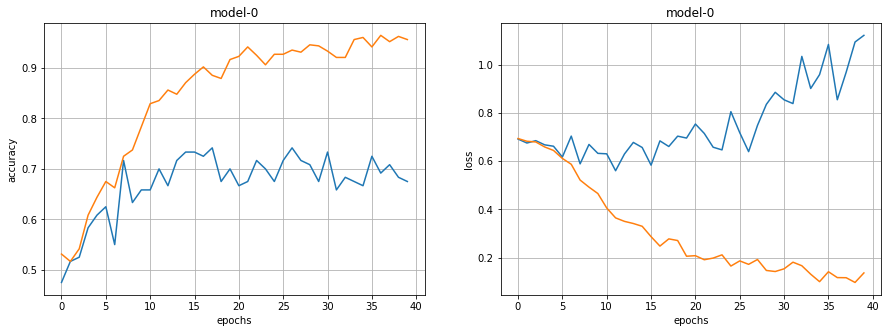

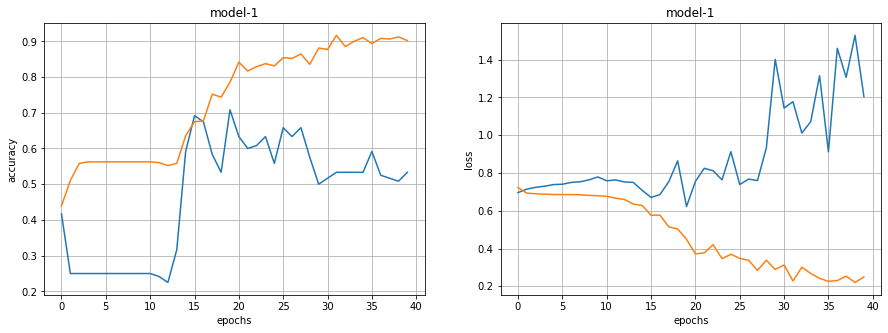

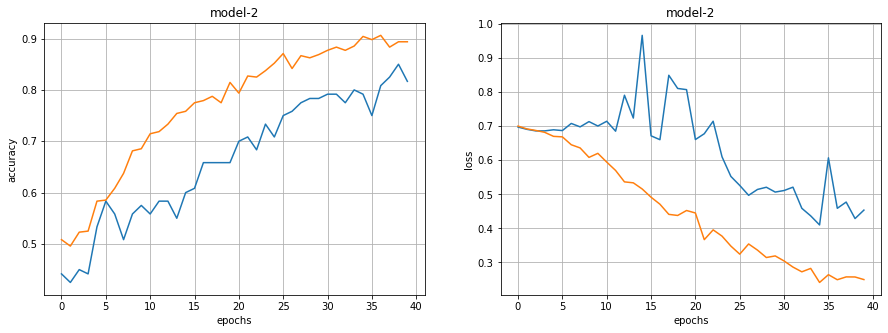

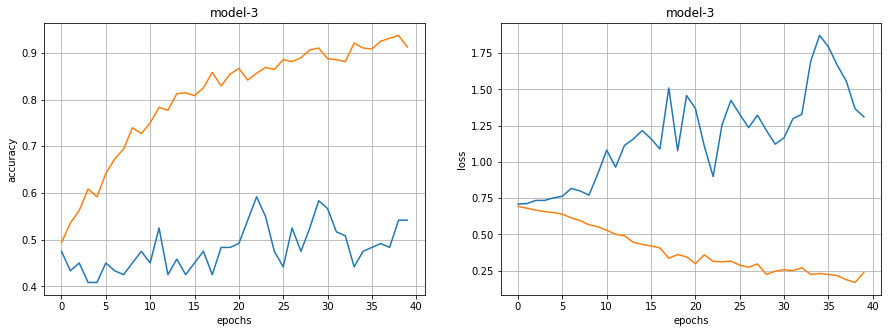

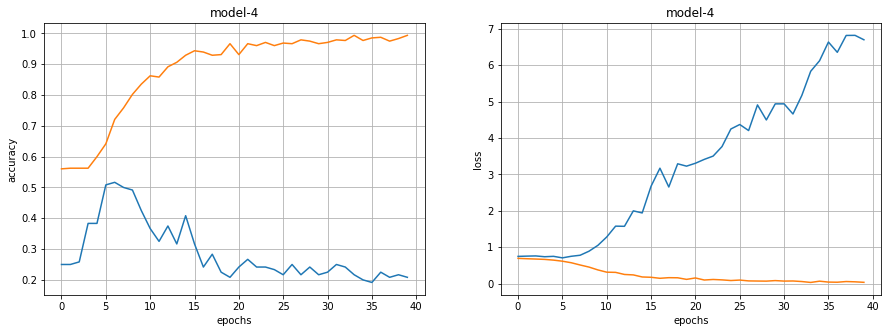

In [20]:
for index, h in enumerate(histories_1):    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))

    val_acc = h.history['val_accuracy']
    val_loss = h.history['val_loss']
    acc = h.history['accuracy']
    loss = h.history['loss']
    
#     ax1.plot(loss, label='Model-%d'%(index+1), marker=this_marker)
#     ax2.plot(val_loss, label='Model-%d'%(index+1), marker=this_marker)

    ax1.plot(val_acc, label="Test")
    ax1.plot(acc, label="Train")
    
    ax2.plot(val_loss, label="Test")
    ax2.plot(loss, label="Train")
    
    ax1.set_title("model-%d"%(index))
    ax2.set_title("model-%d"%(index))
    ax1.set_ylabel('accuracy')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epochs')
    ax1.set_xlabel('epochs')
    ax1.grid(True)
    ax2.grid(True)
    plt.show()

In [17]:
!pip install prettytable
from prettytable import PrettyTable

In [22]:
epochs_array_t = np.load('Data/data_array_t.npy') 
epochs_label_t= np.load('Data/label_array_t.npy')
group_array_t= np.load('Data/group_array_t.npy')

In [25]:
epochs_array_t.shape, epochs_label_t.shape, group_array_t.shape

((600, 65, 256), (600,), (600,))

In [26]:
epochs_array_t=np.moveaxis(epochs_array_t,1,2)
epochs_array_t.shape

(600, 256, 65)

In [30]:
x = PrettyTable()
x.field_names = ["Model Name",  "Validation Accuracy e=10", "Validation Loss e=10"]


for index, h in enumerate(histories_1):
    validation = models[index].evaluate(epochs_array_t, epochs_label_t, verbose=0)
    x.add_row(["model-%d"%(index+1), round(h.history['val_accuracy'][10],4), round(h.history['val_loss'][10],4)])
print(x)

+------------+--------------------------+----------------------+
| Model Name | Validation Accuracy e=10 | Validation Loss e=10 |
+------------+--------------------------+----------------------+
|  model-1   |          0.6583          |        0.6303        |
|  model-2   |           0.25           |        0.7587        |
|  model-3   |          0.5583          |        0.7145        |
|  model-4   |           0.45           |        1.0812        |
|  model-5   |          0.3667          |        1.2803        |
+------------+--------------------------+----------------------+
